# Sensitivity 

## Theory

## Minimum detectable continuum flux (MDCF)

The first sensitivity number are the minimum detectable continuum. To compute this number we will consider the signal detected by all the spectral pixels for a single spaxel (i.e. the 16 pixel).

It is customary for SOFIA to express sensitivities as 4 $\sigma$ values for an observation of 900s.

During FIFI-LS observations, each ramp integration time is 0.12 s.

So, when computing the MDCF, we will use the formula:

$MDCF (\lambda) = \frac{4  \sigma_{pix}(\lambda)}{ \sqrt{16}} \frac{ \sqrt{\frac{0.12}{900}} }{ R(\lambda)}$

where $\sqrt{16}$ takes into account the contribution of 16 pixels and $\sqrt{\frac{0.12}{900}}$ transforms the 0.12 s observation into a 900 s observation. 

$R(\lambda)$ is the response at wavelength $\lambda$. Therefore, we have:

$MDCF (\lambda) =    \sqrt{\frac{0.12}{900}} \frac{\sigma_{pix}(\lambda)}{ R(\lambda)}$

## Minimum detectable line flux (MDLF)

### From MDCF to MDLF

We assume an unresolved line (i.e. the spectral resolution gives us the FWHM of the line) and an amplitude
equal to the minimum detectable continuum flux. The resolution at a defined wavelength is based on the fact that two lines are seen only if at a $FWHM$ of distance. So, 

$ R =  \frac{\lambda}{FWHM} $

Assuming a Gaussian line of scale $\sigma$, since $ FWHM = 2 \sqrt{2 \ln 2} \sigma$, this means:

$ \sigma = \frac{\lambda}{2\sqrt{2 \ln2} R} $

If we assume that the line has a SNR=4 at its top, this means that the amplitude of the Gaussian is equal to the
minimum MDCF.

$ MDLF =  MDCF_{\lambda}  \sqrt{2  \pi}  \sigma$

Using the previous equation, we get:

$ MDLF =  MDCF_{\lambda}  \sqrt{\pi/\ln(2)}  \lambda / R$

Now, to express $MDCF$ in wavelength we have to tranform it:

$ MDCF_{\lambda}[W/m^2] = MDCF_{\nu}[Jy] \cdot 10^{-26} W/m^2 \cdot c /\lambda^2$

By expressing everything in the same unit system:

$ MDLF[W/m^2] = MDCF_{\nu}[Jy] \cdot 10^{-26} W/m^2 \cdot \sqrt{\pi/\ln(2)} \cdot 2.99792458 \cdot 10^{8} m s^{-1} / (\lambda[\mu m] \cdot 10^{-6} R) $

Which means:

$ MDLF [W/m^2] = 3.19 \cdot 10^{-12} \cdot \frac{ MDCF_{\nu}[Jy] }{ \lambda[\mu m]  R} $,

or, more conveniently:

$ MDLF [10^{-17} W/m^2] =3.19 \cdot 10^{5} \cdot \frac{ MDCF_{\nu}[Jy] }{\lambda[\mu m]  R}  $

### Optimal detection interval

To go from the minimum detectable continuum which is evaluated per spaxel, i.e. considering the contributions of all the 16 pixel for each spaxel, we have to consider the optimal spectral aperture to detect a line which roughly correspond to the FWHM.
Let suppose we integrate the flux in the interval $[\lambda_0-L,\lambda_0+L]$ around the reference wavelength ($\lambda_0$):

$
S/N = \frac{\frac{1}{\sqrt{2\pi\sigma}} \int_{\lambda_0-L}^{\lambda_0+L} F_0 e^{-({\lambda-\lambda_0})^2/(2\sigma^2)} d\lambda}{\sqrt{\frac{2L}{\delta_{pix}} }\sigma_{pix}}
=\frac{\frac{1}{\sqrt{2\pi\sigma}} 2 \int_0^L F_0 e^{-\lambda^2/(2\sigma^2)} d\lambda}{\sqrt{\frac{2L}{\delta_{pix}} }\sigma_{pix}}
=\frac{ F_0   }{\sqrt{\frac{2\sqrt{2}}{\delta_{pix}}}\sigma_{pix}}\frac {erf(\frac{L}{\sigma\sqrt{2}})}{\sqrt{\frac{L}{\sigma\sqrt{2}}}}
$

where $erf(z) = \frac{2}{\sqrt{\pi}}\int_0^z e^{-t^2} dt$ and  in the denominator we have the number of pixels in the interval $2L/\delta_{pix}$, with $\delta_{pix}$ the size of the pixel in wavelength  and $\sigma_{pix}$ the noise in the single spectral pixel.

To function to maximise is: $erf(x)/\sqrt(x)$ which has a maximum at $x=\frac{L}{\sqrt{2}\sigma}\approx1$, which means an interval of $2\sqrt{2}\sigma$ (see later).

Inside this interval, 84% of the total flux is detected.


Now, since the spectral resolution is defined as:

$ R =  \frac{\lambda}{FWHM} $

assuming a Gaussian line of scale $\sigma$, since $ FWHM = 2 \sqrt{2 \ln 2} \sigma$, this means:

$ \sigma = \frac{\lambda}{2\sqrt{2 \ln2} R} $

Therefore, the optimal interval to measure the flux of the line is:

$ \Delta \lambda = 2 \sqrt{2} \sigma = \frac{\lambda}{\sqrt{\ln 2} R}$

So, the number of pixels in the optimal interval is:

$ N_{pix} =  \frac{\lambda}{\sqrt{\ln 2} R  \delta_{pix}}$

where $\delta_{pix}$ is the spectral width of a pixel.

As we can see a little further on, the number of spectral pixels in the optimal interval is between 3 and 4 pixels. 
We therefore assume $N_{pix}=4$.

So, if MDCF is evaluated on 16 pixels, we will have for 4 pixels a noise of $MDCF \sqrt{16/4} = 2 \times MDCF$.

The factor to detect the peak should therefore be multiplied by $2 / 0.84$.

So, our final formula is:

$ MDLF [10^{-17} W/m^2] = 7.60 \cdot 10^{5} \cdot \frac{MDCF_{\nu}[Jy]}{\lambda[\mu m] \cdot R} $


### Maximum of erf(x)/sqrt(x)

Maximum at:  0.9899400000000026
Flux at maximum:  0.8427323194675795


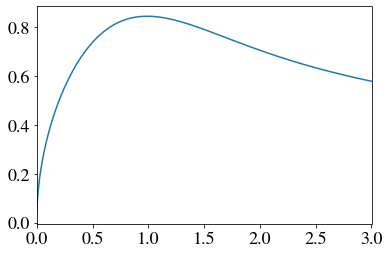

In [2]:
# Typical imports
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='STIXGeneral'
rcParams['font.size']=18
rcParams['mathtext.fontset']='stix'
rcParams['legend.numpoints']=1
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf

# Maximum of erf(x)/sqrt(x)
x=np.arange(0.001,3,0.00001)
y = erf(x)/np.sqrt(x)
plt.plot(x,y)
idx = np.nanargmax(y)
print('Maximum at: ',x[idx])
print('Flux at maximum: ',np.nanmax(y))
plt.xlim([0,3])
plt.show()

### Number of pixels in optimal detection interval

The computation of the number of spectral pixels involved in the detection of an unresolved line requires the knowledge of the spectral width of the pixels. 

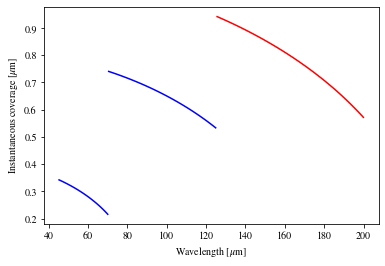

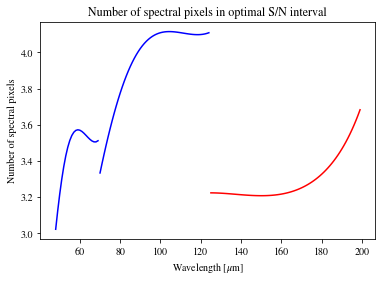

In [3]:
from fifipy.calib import waveCal
from fifipy.spectra import getResolution
from scipy.interpolate import interp1d
import numpy as np

# Computation of wavelengths
ll = []
band = []
for g in np.arange(300000,1800000,10000):
    l,lw = waveCal(gratpos=g,order=1,array='RED',dichroic=105,obsdate='2019-03-12T04:41:33')
    ll.append(l[12,8])
    band.append(np.sum(lw[12,:]))
    
ll=np.array(ll); band=np.array(band)
Rcov = interp1d(ll,band)
idx = (ll > 125 ) & (ll < 200)
plt.plot(ll[idx],band[idx],color='red')

ll = []
band = []
for g in np.arange(50000,1800000,10000):
    l,lw = waveCal(gratpos=g,order=1,array='BLUE',dichroic=130,obsdate='2019-03-12T04:41:33')
    ll.append(l[12,8])
    band.append(np.sum(lw[12,:]))
    
ll=np.array(ll); band=np.array(band)
B1cov = interp1d(ll,band)
idx = (ll > 70 ) & (ll < 125)
plt.plot(ll[idx],band[idx],color='blue')

ll = []
band = []
for g in np.arange(300000,1800000,10000):
    l,lw = waveCal(gratpos=g,order=2,array='BLUE',dichroic=130,obsdate='2019-03-12T04:41:33')
    ll.append(l[12,8])
    band.append(np.sum(lw[12,:]))
    
ll=np.array(ll); band=np.array(band)
B2cov = interp1d(ll,band)
idx = (ll > 45 ) & (ll < 70)
plt.plot(ll[idx],band[idx],color='blue')
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Instantaneous coverage [$\mu$m]')
plt.show()

# Optimal number of pixels used to compute the flux
wave=np.arange(125,200,1)
delta = Rcov(wave)/16.
npix = wave/(np.sqrt(np.log(2))*getResolution('R', wave)*delta)
plt.plot(wave,npix,color='red')
wave=np.arange(48,70,1)
delta = B2cov(wave)/16.
npix = wave/(np.sqrt(np.log(2))*getResolution('B2', wave)*delta)
plt.plot(wave,npix,color='blue')
wave=np.arange(70,125,1)
delta = B1cov(wave)/16.
npix = wave/(np.sqrt(np.log(2))*getResolution('B1', wave)*delta)
plt.plot(wave,npix,color='blue')
plt.xlabel('Wavelength [$\mu$m]')
plt.title('Number of spectral pixels in optimal S/N interval')
plt.ylabel('Number of spectral pixels')
plt.show()

# R 105


 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_R_105_Nov06/reduced/
number of files  177
.................................................................................................................................................................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_R_105_Nov06b/reduced/
number of files  198
......................................................................................................................................................................................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_R_105_Nov06c/reduced/
number of files  32
................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_R_105_Nov09/reduced/
number of files  132
....................................................................................................................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_R_105_Nov09b/redu

/Users/dfadda/Python/fifipy/fifipy/sensitivity.py:185: RuntimeWarning: invalid value encountered in greater
  m = (s > 0.01) & (s < 10); idx *= m
/Users/dfadda/Python/fifipy/fifipy/sensitivity.py:185: RuntimeWarning: invalid value encountered in less
  m = (s > 0.01) & (s < 10); idx *= m


limits in wavelength  114.52394082822491 206.91645449305406


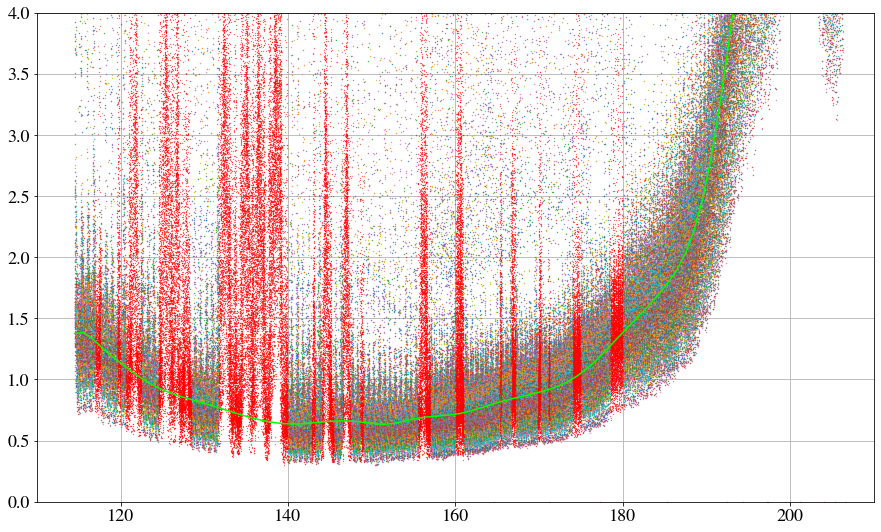

1.852507748544914


In [4]:
from fifipy.sensitivity import readRamps, computeSensitivity
%matplotlib inline
fluxcaldir = '/Users/dfadda/sofia/FIFI-LS/FluxCal/'
direcs = [
    '/Data2/2018/Mars_R_105_Nov06',
    '/Data2/2018/Mars_R_105_Nov06b',
    '/Data2/2018/Mars_R_105_Nov06c',
    '/Data2/2018/Mars_R_105_Nov09',
    '/Data2/2018/Mars_R_105_Nov09b',
    '/Data2/2018/Mars_R_105_Nov09c',
    '/Data2/2019/Mars_R_105_Feb27',
    '/Data2/2019/Mars_R_105_Feb28',
    '/Data2/2019/Mars_R_105_May02'
]
waves, dwaves, error, flux, exptime, obsdate = readRamps(fluxcaldir, direcs)
computeSensitivity(fluxcaldir+'NewFiltersResponse', 'Red', 1, 105, waves, dwaves, error, exptime, obsdate)

# R 130


 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_R_130_Nov07/reduced/
number of files  223
...............................................................................................................................................................................................................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_R_130_Nov08/reduced/
number of files  32
................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_R_130_Nov08b/reduced/
number of files  158
..............................................................................................................................................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_R_130_Nov08c/reduced/
number of files  30
..............................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2019/Mars_R_130_Feb27/reduced/
number of files  164
........................................................................

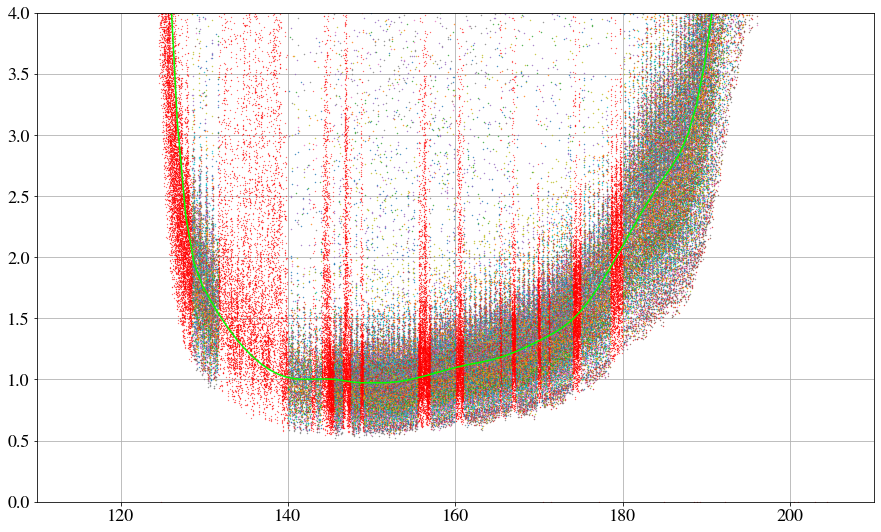

2.6541976240942224


In [5]:
from fifipy.sensitivity import readRamps, computeSensitivity
%matplotlib inline
fluxcaldir = '/Users/dfadda/sofia/FIFI-LS/FluxCal/'
direcs = [
    '/Data2/2018/Mars_R_130_Nov07',
    '/Data2/2018/Mars_R_130_Nov08',
    '/Data2/2018/Mars_R_130_Nov08b',
    '/Data2/2018/Mars_R_130_Nov08c',
    '/Data2/2019/Mars_R_130_Feb27',
    '/Data2/2019/Mars_R_130_Feb28',
    '/Data2/2019/Mars_R_130_May02'
]
waves, dwaves, error, flux, exptime, obsdate = readRamps(fluxcaldir, direcs)
computeSensitivity(fluxcaldir + 'NewFiltersResponse', 'Red', 1, 130, waves, dwaves, error,exptime,obsdate)

# Blue (order 1, dichroic 105)


 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_B1_105_Nov06/reduced/
number of files  111
...............................................................................................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data22018/Mars_B1_105_Nov06b/reduced/
number of files  0

 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data22018/Mars_B1_105_Nov09/reduced/
number of files  0

 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data22019/Mars_B1_105_Feb28/reduced/
number of files  0
Good pixels  [ 0  1  2  3  5  6  7  8 10 11 12 13 14 15 16 18 20 22 23 24]
limits in wavelength  67.42523744606939 94.18627463145123


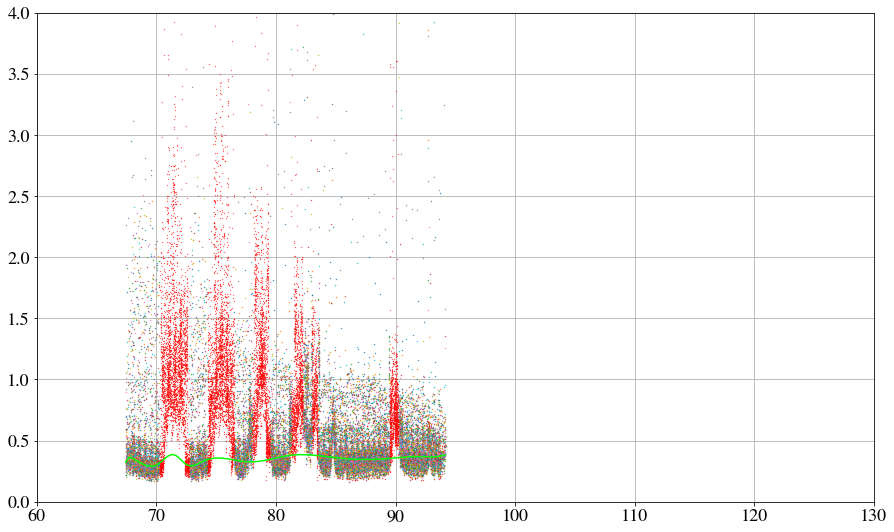

0.3509725402759987


In [6]:
from fifipy.sensitivity import readRamps, computeSensitivity
%matplotlib inline
fluxcaldir = '/Users/dfadda/sofia/FIFI-LS/FluxCal/'
direcs = [
    '/Data2/2018/Mars_B1_105_Nov06',
    '/Data22018/Mars_B1_105_Nov06b',
    '/Data22018/Mars_B1_105_Nov09',
    '/Data22019/Mars_B1_105_Feb28'
]
waves, dwaves, error, flux, exptime, obsdate = readRamps(fluxcaldir, direcs)
computeSensitivity(fluxcaldir + 'NewFiltersResponse', 'Blue', 1, 105, waves, dwaves, error,exptime,obsdate)

# Blue (Order 1, Dichroic 130)


 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_B1_130_Nov07/reduced/
number of files  223
...............................................................................................................................................................................................................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_B1_130_Nov08/reduced/
number of files  30
..............................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2019/Mars_B1_130_Feb27/reduced/
number of files  164
....................................................................................................................................................................Good pixels  [ 0  1  2  3  5  6  7  8 10 11 12 13 15 16 18 20 22 23 24]
limits in wavelength  67.4956681481251 126.05882687787167


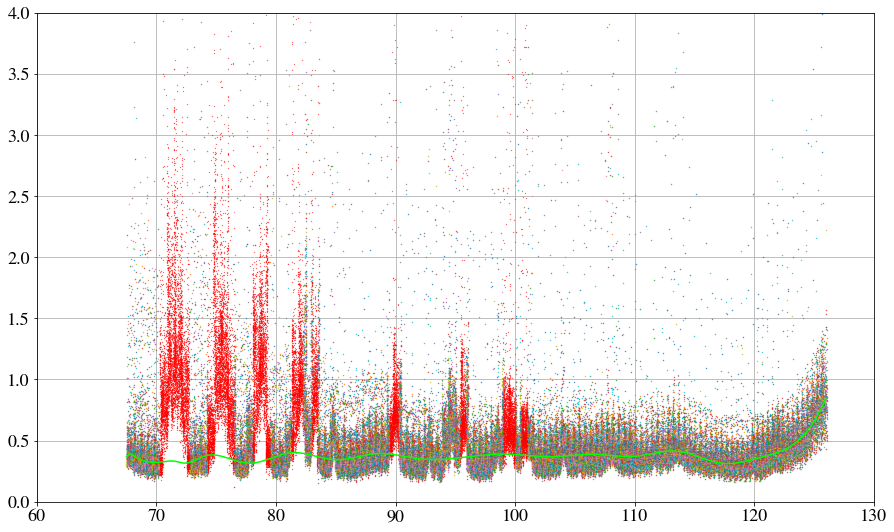

0.3800316835678892


In [7]:
from fifipy.sensitivity import readRamps, computeSensitivity
%matplotlib inline
fluxcaldir = '/Users/dfadda/sofia/FIFI-LS/FluxCal/'
direcs = [
    '/Data2/2018/Mars_B1_130_Nov07',
    '/Data2/2018/Mars_B1_130_Nov08',
    '/Data2/2019/Mars_B1_130_Feb27'
]
waves, dwaves, error, flux, exptime, obsdate = readRamps(fluxcaldir, direcs)
computeSensitivity(fluxcaldir + 'NewFiltersResponse', 'Blue', 1, 130, waves, dwaves, error,exptime,obsdate)

# Blue (Order 2, Dichroic 105)


 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_B2_105_Nov06/reduced/
number of files  177
.................................................................................................................................................................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_B2_105_Nov06b/reduced/
number of files  32
................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_B2_105_Nov09/reduced/
number of files  132
....................................................................................................................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_B2_105_Nov09b/reduced/
number of files  108
............................................................................................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2019/Mars_B2_105_Feb27/reduced/
number of files  162
............................................................

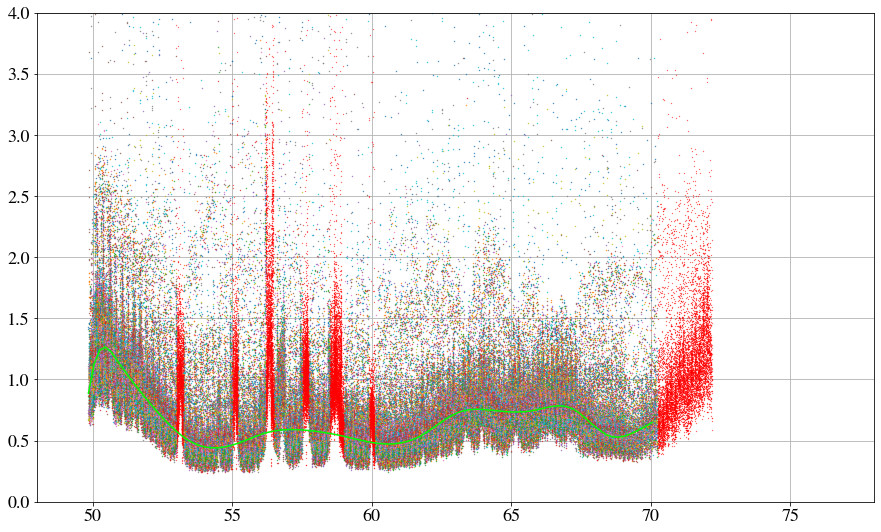

0.6551622519630054


In [8]:
from fifipy.sensitivity import readRamps, computeSensitivity
%matplotlib inline
fluxcaldir = '/Users/dfadda/sofia/FIFI-LS/FluxCal/'
direcs = [
    '/Data2/2018/Mars_B2_105_Nov06',
    '/Data2/2018/Mars_B2_105_Nov06b',
    '/Data2/2018/Mars_B2_105_Nov09',
    '/Data2/2018/Mars_B2_105_Nov09b',
    '/Data2/2019/Mars_B2_105_Feb27',
    '/Data2/2019/Mars_B2_105_May02'
]
waves, dwaves, error, flux, exptime, obsdate = readRamps(fluxcaldir, direcs)
computeSensitivity(fluxcaldir + 'NewFiltersResponse', 'Blue', 2, 105, waves, dwaves, error,exptime,obsdate)

# Blue (Order 2, Dichroic 130)


 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_B2_130_Nov08/reduced/
number of files  32
................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2018/Mars_B2_130_Nov08b/reduced/
number of files  160
................................................................................................................................................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2019/Mars_B2_130_Feb28/reduced/
number of files  34
..................................
 /Users/dfadda/sofia/FIFI-LS/FluxCal//Data2/2019/Mars_B2_130_May02/reduced/
number of files  104
........................................................................................................Good pixels  [ 0  1  2  3  5  6  7  8 10 11 12 13 15 16 18 20 22 23]
limits in wavelength  49.85317424992019 70.24428493040047


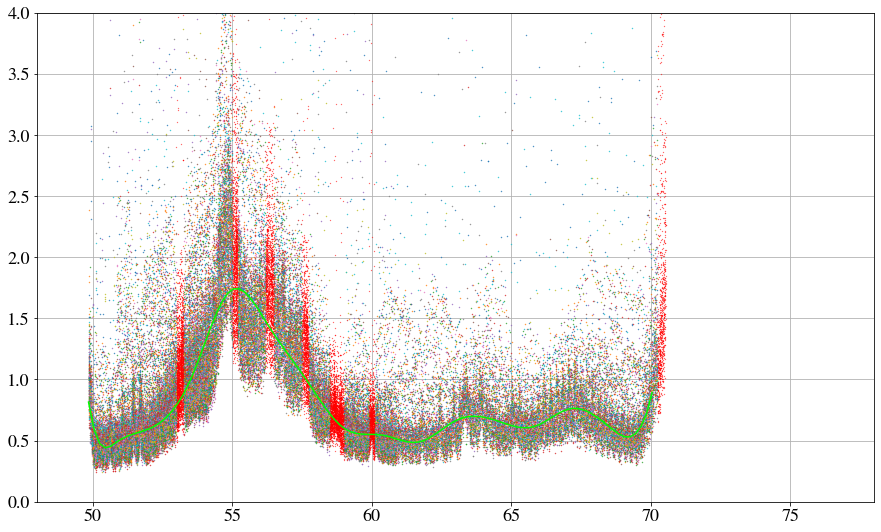

0.7965121203985328


In [9]:
from fifipy.sensitivity import readRamps, computeSensitivity
%matplotlib inline
fluxcaldir = '/Users/dfadda/sofia/FIFI-LS/FluxCal/'
direcs = [
    '/Data2/2018/Mars_B2_130_Nov08',
    '/Data2/2018/Mars_B2_130_Nov08b',
    '/Data2/2019/Mars_B2_130_Feb28',
    '/Data2/2019/Mars_B2_130_May02'
]
waves, dwaves, error, flux, exptime, obsdate = readRamps(fluxcaldir, direcs)
computeSensitivity(fluxcaldir + 'NewFiltersResponse', 'Blue', 2, 130, waves, dwaves, error,exptime,obsdate)

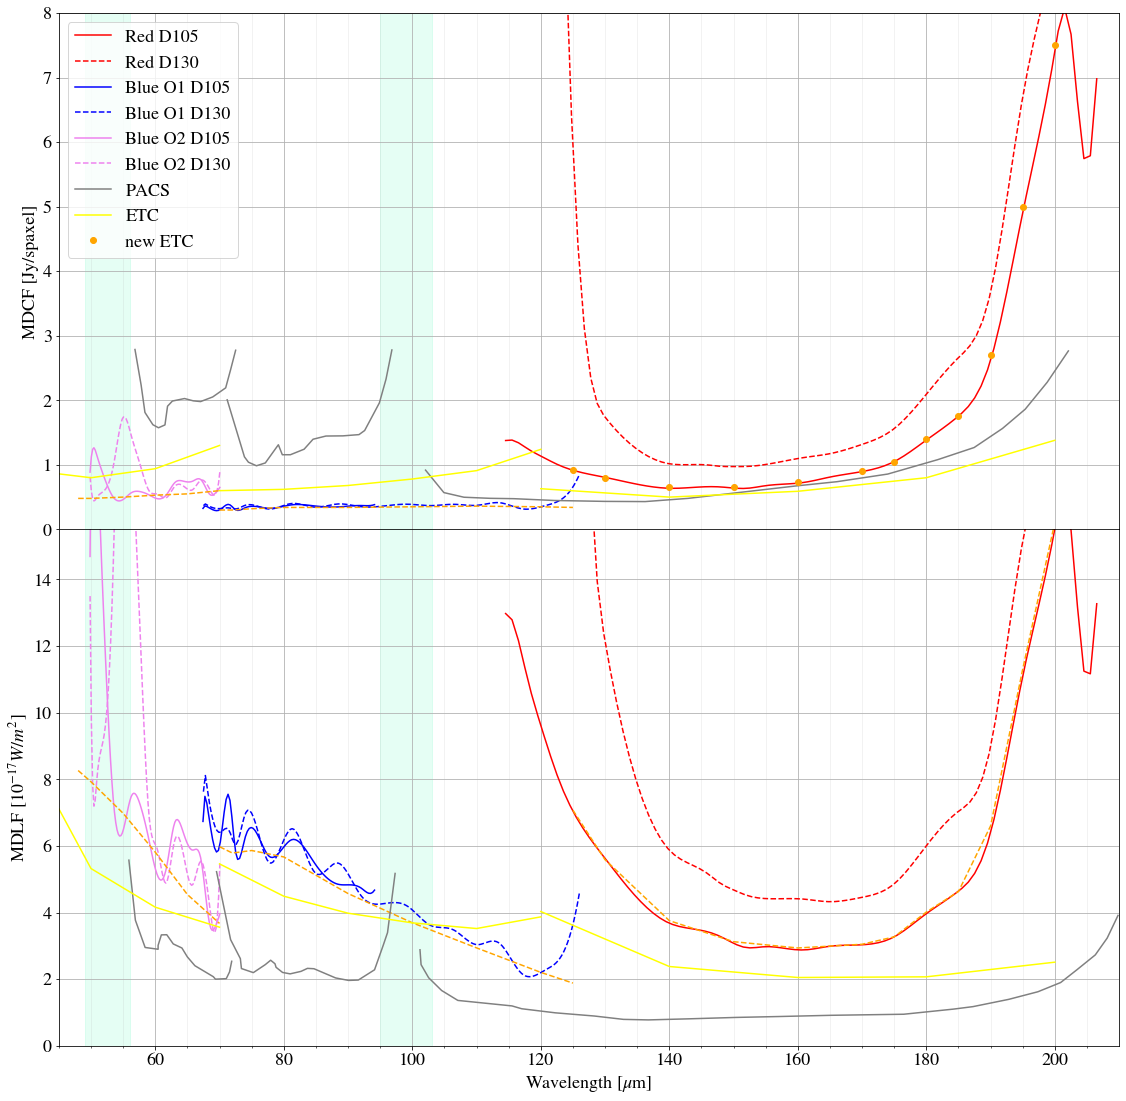

In [14]:
from astropy.io import fits
from fifipy.calib import waveCal
from fifipy.spectra import getResolution
from scipy.interpolate import interp1d
import numpy as np
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='STIXGeneral'
rcParams['font.size']=18
rcParams['mathtext.fontset']='stix'
rcParams['legend.numpoints']=1
import matplotlib.pyplot as plt

fluxcaldir = '/Users/dfadda/sofia/FIFI-LS/FluxCal/'


# PACS (rescaled from 1-sigma in 400s to 4-sigma in 900s)
#fac = 4./np.sqrt(900./400.)
#wm2 = np.array([45,50,55,60,70])
#mcdf2p = np.array([np.nan,np.nan,1.0,0.6,0.7])*fac
#wm1 = np.array([70,80,90,100,110,120])
#mcdf1p = np.array([0.7,0.4,0.5,1.0,np.nan,np.nan])*fac
#wmr = np.array([100,110,120,140,160,180,200])
#mcdfrp = np.array([0.3,0.2,0.15,0.15,0.28,0.35,1.0])*fac
#mdlf2p = np.array([np.nan,np.nan,2,1,0.75])*fac
#mdlf1p = np.array([1.9,0.8,0.7,2.5,np.nan,np.nan])*fac
#mdlfrp = np.array([1.,0.5,0.3,0.3,0.3,0.4,0.8])*fac

# PACS
fac = 4. / (np.sqrt(900./450.))
pacs = np.loadtxt('PACS_MDCF_blue.txt', skiprows=1)
wm2 = pacs[:,0]
mcdf2p = pacs[:,1] * fac #/ 4.
pacs = np.loadtxt('PACS_MDCF_green.txt', skiprows=1)
wm1 = pacs[:,0]
mcdf1p = pacs[:,1] * fac #/ 4.
pacs = np.loadtxt('PACS_MDCF_red.txt', skiprows=1)
wmr = pacs[:,0]
mcdfrp = pacs[:,1] * fac


D=2.7
Dichroic = ['105','130','105','130','105','130']
Channel = ['Red','Red','Blue','Blue','Blue','Blue']
Order = ['1','1','1','1','2','2']

fig,axes = plt.subplots(2,1,figsize=(19,19), sharex=True)
ax = axes[0]
ax.axvspan(49, 56, alpha=0.1, color='mediumspringgreen')
ax.axvspan(95, 103, alpha=0.1, color='mediumspringgreen')
for d,c,o in zip(Dichroic,Channel,Order):
    hdu = fits.open(fluxcaldir+'NewFiltersResponse/Sensitivity_'+c+'_D'+d+'_Ord'+o+'.fits')
    f = hdu['PRIMARY'].data
    w = f[0,:]
    s = f[1,:] 
    hdu.close()
    if c == 'Blue': 
        label = c+' O'+o+' D'+d
        if o == '1':
            color = 'blue'
        else:
            color = 'violet'
    else:
        color = 'red'
        label = c + ' D'+d
    if d == '105':
        linestyle = '-'
    else:
        linestyle = '--'
    ax.plot(w,s,color=color,linestyle=linestyle, label=label)
    
ax.plot(wmr,mcdfrp,color='grey',label='PACS')
ax.plot(wm1,mcdf1p,color='grey')
ax.plot(wm2,mcdf2p,color='grey')


# Red (old values in ETC)
wmr_  = np.array([120,140,160,180,200])
mcdfr_ = np.array([0.63,0.50,0.59,0.80,1.38]) 
## Blue - ord 1 
wm1_ = np.array([70,80,90,100,110,120])
mcdf1_ = np.array([0.60,0.62,0.68,0.78,0.91,1.24])
## Blue - ord 2 
wm2_ = np.array([45,50,60,70])
mcdf2_ = np.array([0.86,0.80,0.94,1.30])
ax.plot(wmr_,mcdfr_,color='yellow',label='ETC')
ax.plot(wm1_,mcdf1_,color='yellow')
ax.plot(wm2_,mcdf2_,color='yellow')

# New values in ETC
nwmr  = np.array([125,130,140,150,160,170,175,180,185,190,195,200])
nmcdfr = np.array([0.92,0.8,0.65,0.65,0.73,0.9,1.05,1.40,1.75,2.7,5,7.5])
nwm1 = np.array([70,72,75,80,90,100,110,120,125])
nmcdf1 = np.array([0.3,0.3,0.32,0.34,0.34,0.35,0.36,0.35,0.34])
nwm2 = np.array([48,50,55,60,65,70])
nmcdf2 = np.array([0.48,0.48,0.50,0.53,0.55,0.6])

ax.plot(nwmr,nmcdfr,'o',color='orange',label='new ETC')
ax.plot(nwm1,nmcdf1,'--',color='orange')
ax.plot(nwm2,nmcdf2,'--',color='orange')


ax.legend()
ax.set_ylim(0,8)
ax.set_xlim(45,210)
minor_ticks = np.arange(45, 210, 5)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel('MDCF [Jy/spaxel]')

ax = axes[1]
ax.axvspan(49, 56, alpha=0.1, color='mediumspringgreen')
ax.axvspan(95, 103, alpha=0.1, color='mediumspringgreen')
for d,c,o in zip(Dichroic,Channel,Order):
    hdu = fits.open(fluxcaldir+'NewFiltersResponse/Sensitivity_'+c+'_D'+d+'_Ord'+o+'.fits')
    f = hdu['PRIMARY'].data
    w = f[0,:]
    s = f[1,:] 
    hdu.close()
    psf = np.arcsin(1.22 * w * 1.e-6/D)*180./np.pi*3600. 
    if c == 'Blue': 
        if o == '1':
            color = 'blue'
            mdlf = s/ (w * getResolution('B1', w)) *3.19e5*2/0.84
        else:
            color = 'violet'
            mdlf = s/ (w * getResolution('B2', w)) *3.19e5*2/0.84
    else:
        color = 'red'
        mdlf = s / (w * getResolution('R', w)) *3.19e5*2/0.84
    if d == '105':
        linestyle = '-'
        label = 'D 105'
    else:
        linestyle = '--'
        label = 'D 130'
    if c == 'Red':
        ax.plot(w,mdlf,color=color,linestyle=linestyle, label = label)
    else:
        ax.plot(w,mdlf,color=color,linestyle=linestyle)
    
#mdlfr = np.array([4.03,2.38,2.05,2.07,2.51]) 
#mdlf1 = np.array([5.46,4.49,3.98,3.69,3.52,3.87])
#mdlf2 = np.array([7.11,5.32,4.16,3.56])
nmdlfr = nmcdfr / (nwmr * getResolution('R', nwmr)) *3.19e5*2/0.84
nmdlf1 = nmcdf1 / (nwm1 * getResolution('B1', nwm1)) *3.19e5*2/0.84
nmdlf2 = nmcdf2 / (nwm2 * getResolution('B2', nwm2)) *3.19e5*2/0.84
ax.plot(nwmr,nmdlfr,'--',color='orange')
ax.plot(nwm1,nmdlf1,'--',color='orange')
ax.plot(nwm2,nmdlf2,'--',color='orange')


# PACS
fac = 4. / (np.sqrt(900./450.))
pacs = np.loadtxt('PACS_MDLF_blue.txt', skiprows=1)
wm2 = pacs[:,0]
mcdf2p = pacs[:,1] * fac /10. 
pacs = np.loadtxt('PACS_MDLF_green.txt', skiprows=1)
wm1 = pacs[:,0]
mcdf1p = pacs[:,1] * fac /10.
pacs = np.loadtxt('PACS_MDLF_red.txt', skiprows=1)
wmr = pacs[:,0]
mcdfrp = pacs[:,1] * fac /10.
ax.plot(wmr,mcdfrp,color='grey')
ax.plot(wm1,mcdf1p,color='grey')
ax.plot(wm2,mcdf2p,color='grey')

mdlfr_ = np.array([4.03,2.38,2.05,2.07,2.51]) 
mdlf1_ = np.array([5.46,4.49,3.98,3.69,3.52,3.87])
mdlf2_ = np.array([7.11,5.32,4.16,3.56])
ax.plot(wmr_,mdlfr_,color='yellow')
ax.plot(wm1_,mdlf1_,color='yellow')
ax.plot(wm2_,mdlf2_,color='yellow',label='ETC')

ax.set_ylim([0,15.5])
ax.set_xlim([45,210])
minor_ticks = np.arange(45, 210, 5)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel('MDLF [$10^{-17} W/m^2$]')
plt.subplots_adjust(hspace=0)
#plt.suptitle('New filter window (2018 and later)')
plt.show()
#fig.savefig(fluxcaldir+'../sensitivities.pdf')
fig.savefig(fluxcaldir+'SensitivitiesNewFilters.pdf')
fig.savefig(fluxcaldir+'SensitivitiesNewFilters.png')


# Sensitivity values for ETC

In [16]:
for w,f,c in zip(nwm2,nmdlf2,nmcdf2):
    print('{:3d} {:9.2e} {:6.3f} {:5.3f} {:8.3e}'.format(w,f*1.e-17,c,B2cov(w),getResolution('B2',w)))
for w,f,c in zip(nwm1,nmdlf1,nmcdf1):
    print('{:3d} {:9.2e} {:6.3f} {:5.3f} {:8.3e}'.format(w,f*1.e-17,c,B1cov(w),getResolution('B1',w)))
for w,f,c in zip(nwmr,nmdlfr,nmcdfr):
    print('{:3d} {:9.2e} {:6.3f} {:5.3f} {:8.3e}'.format(w,f*1.e-17,c,Rcov(w),getResolution('R',w)))

 48  8.26e-17  0.480 0.332 9.193e+02
 50  7.92e-17  0.480 0.325 9.201e+02
 55  6.98e-17  0.500 0.304 9.895e+02
 60  5.81e-17  0.530 0.280 1.155e+03
 65  4.54e-17  0.550 0.251 1.416e+03
 70  3.67e-17  0.600 0.215 1.772e+03
 70  5.98e-17  0.300 0.741 5.448e+02
 72  5.79e-17  0.300 0.736 5.470e+02
 75  5.86e-17  0.320 0.729 5.529e+02
 80  5.67e-17  0.340 0.715 5.694e+02
 90  4.57e-17  0.340 0.685 6.278e+02
100  3.69e-17  0.350 0.650 7.199e+02
110  2.94e-17  0.360 0.608 8.457e+02
120  2.20e-17  0.350 0.560 1.005e+03
125  1.88e-17  0.340 0.532 1.098e+03
125  7.07e-17  0.920 0.943 7.906e+02
130  5.59e-17  0.800 0.927 8.369e+02
140  3.76e-17  0.650 0.892 9.388e+02
150  3.12e-17  0.650 0.854 1.053e+03
160  2.94e-17  0.730 0.810 1.180e+03
170  3.05e-17  0.900 0.762 1.320e+03
175  3.27e-17  1.050 0.735 1.394e+03
180  4.01e-17  1.400 0.707 1.471e+03
185  4.63e-17  1.750 0.677 1.552e+03
190  6.60e-17  2.700 0.644 1.636e+03
195  1.13e-16  5.000 0.609 1.723e+03
200  1.57e-16  7.500 0.571 1.813e+03


Taking into account the degradation after subtracting the sky ($\sqrt 2$).

In [17]:
import numpy as np
s2 = np.sqrt(2.)
for w,f,c in zip(nwm2,nmdlf2,nmcdf2):
    print('{:3d} {:9.2e} {:6.3f} {:5.3f} {:8.3e}'.format(w,f*1.e-17*s2,c*s2,B2cov(w),getResolution('B2',w)))
for w,f,c in zip(nwm1,nmdlf1,nmcdf1):
    print('{:3d} {:9.2e} {:6.3f} {:5.3f} {:8.3e}'.format(w,f*1.e-17*s2,c*s2,B1cov(w),getResolution('B1',w)))
for w,f,c in zip(nwmr,nmdlfr,nmcdfr):
    print('{:3d} {:9.2e} {:6.3f} {:5.3f} {:8.3e}'.format(w,f*1.e-17*s2,c*s2,Rcov(w),getResolution('R',w)))

 48  1.17e-16  0.679 0.332 9.193e+02
 50  1.12e-16  0.679 0.325 9.201e+02
 55  9.87e-17  0.707 0.304 9.895e+02
 60  8.22e-17  0.750 0.280 1.155e+03
 65  6.42e-17  0.778 0.251 1.416e+03
 70  5.19e-17  0.849 0.215 1.772e+03
 70  8.45e-17  0.424 0.741 5.448e+02
 72  8.18e-17  0.424 0.736 5.470e+02
 75  8.29e-17  0.453 0.729 5.529e+02
 80  8.02e-17  0.481 0.715 5.694e+02
 90  6.46e-17  0.481 0.685 6.278e+02
100  5.22e-17  0.495 0.650 7.199e+02
110  4.16e-17  0.509 0.608 8.457e+02
120  3.12e-17  0.495 0.560 1.005e+03
125  2.66e-17  0.481 0.532 1.098e+03
125  1.00e-16  1.301 0.943 7.906e+02
130  7.90e-17  1.131 0.927 8.369e+02
140  5.31e-17  0.919 0.892 9.388e+02
150  4.42e-17  0.919 0.854 1.053e+03
160  4.15e-17  1.032 0.810 1.180e+03
170  4.31e-17  1.273 0.762 1.320e+03
175  4.62e-17  1.485 0.735 1.394e+03
180  5.68e-17  1.980 0.707 1.471e+03
185  6.55e-17  2.475 0.677 1.552e+03
190  9.33e-17  3.818 0.644 1.636e+03
195  1.60e-16  7.071 0.609 1.723e+03
200  2.22e-16 10.607 0.571 1.813e+03
